In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

matplotlib.rcParams['pdf.fonttype'] = 42

In [3]:
path = "/sdf/data/lcls/ds/prj/prjs2e21/results/COOKIE_ML_Output/regression/run_09082024_Resnext34_dif_Ximg_Denoised_2/evaluate_outputs5_11112024/Resnext34_dif_XimgDenoised_wrapping_4_plot_data.pkl"

In [5]:
with open(path, 'rb') as f:
    data = pickle.load(f)

# Access specific elements
true_phase_list = data["true_phase_list"]
predicted_phase_list = data["predicted_phase_list"]
predicted_pulses = data["predicted_pulses"]
mask_two_pulses = data["mask_two_pulses"]

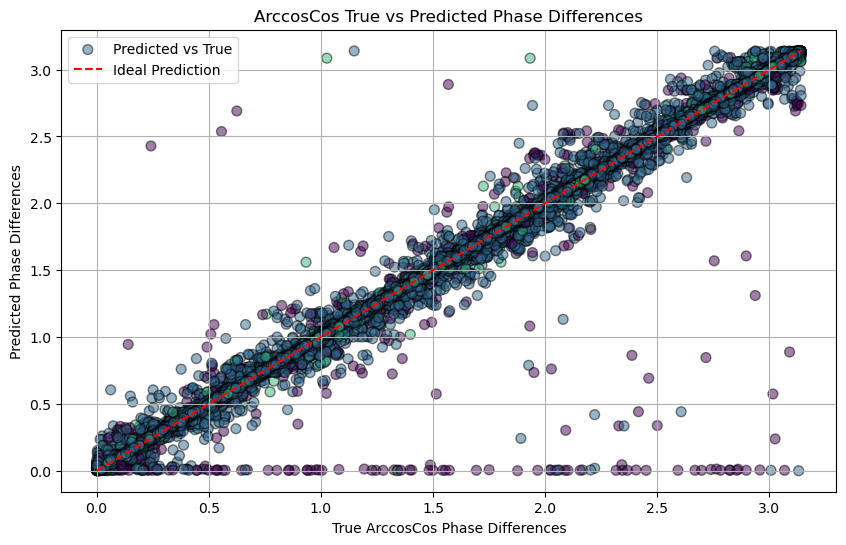

In [10]:
plt.figure(figsize=(10, 6))

# Scatter plot with color-coded points
scatter = plt.scatter(np.arccos(np.cos(true_phase_list)), 
                    predicted_phase_list, 
                    c=predicted_pulses, 
                    # cmap=cmap, 
                    marker='o',
                    label='Predicted vs True', 
                    s=50, edgecolor='k', alpha=0.5)
        
# # Set colorbar, ensuring the ticks are in the middle of each color band
# cbar = plt.colorbar(scatter, ticks=np.linspace(0, 4, 5))  # Midpoints for color categories
# cbar.ax.set_yticklabels(['0', '1', '2', '3', '4+'])
# cbar.set_label('LSTM Classifier Categories')

# Plot the ideal prediction line
plt.plot([np.arccos(np.cos(true_phase_list)).min(), np.arccos(np.cos(true_phase_list)).max()], 
        [np.arccos(np.cos(true_phase_list)).min(), np.arccos(np.cos(true_phase_list)).max()], 
        color='red', linestyle='--', label='Ideal Prediction')

plt.xlabel('True ArccosCos Phase Differences')
plt.ylabel('Predicted Phase Differences')
plt.title('ArccosCos True vs Predicted Phase Differences')
plt.legend()
plt.grid(True)

Class counts:
Class 2: 50512
Class 3: 5427
Class 1: 1403
Class 4: 2


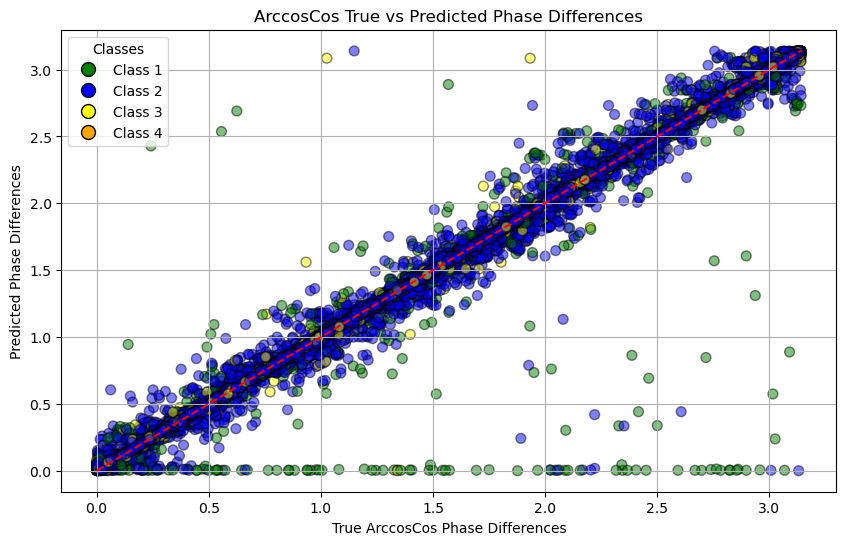

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Define colors for each class
color_map = {1: 'green', 2: 'blue', 3: 'yellow', 4: "orange"}
colors = [color_map[int(p)] for p in predicted_pulses]  # Map predicted_pulses to colors

# Count the number of occurrences for each class
class_counts = Counter(predicted_pulses)
print("Class counts:")
for cls, count in class_counts.items():
    print(f"Class {cls}: {count}")
    

plt.figure(figsize=(10, 6))

# Scatter plot with color-coded points based on classes
scatter = plt.scatter(
    np.arccos(np.cos(true_phase_list)), 
    predicted_phase_list, 
    c=colors,  # Assign colors based on class
    marker='o', 
    s=50, 
    edgecolor='k', 
    alpha=0.5
)

# Create a custom legend for the classes
class_labels = {1: 'Class 1', 2: 'Class 2', 3: 'Class 3', 4: 'Class 4'}
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=class_labels[key],
                              markerfacecolor=color_map[key], markersize=10, markeredgecolor='k')
                   for key in class_labels]
plt.legend(handles=legend_elements, title="Classes", loc="upper left")

# Plot the ideal prediction line
plt.plot(
    [np.arccos(np.cos(true_phase_list)).min(), np.arccos(np.cos(true_phase_list)).max()], 
    [np.arccos(np.cos(true_phase_list)).min(), np.arccos(np.cos(true_phase_list)).max()], 
    color='red', linestyle='--', label='Ideal Prediction'
)

plt.xlabel('True ArccosCos Phase Differences')
plt.ylabel('Predicted Phase Differences')
plt.title('ArccosCos True vs Predicted Phase Differences')
plt.grid(True)
plt.show()


Class counts:
Class 2: 50512
Class 3: 5427
Class 1: 1403
Class 4: 2


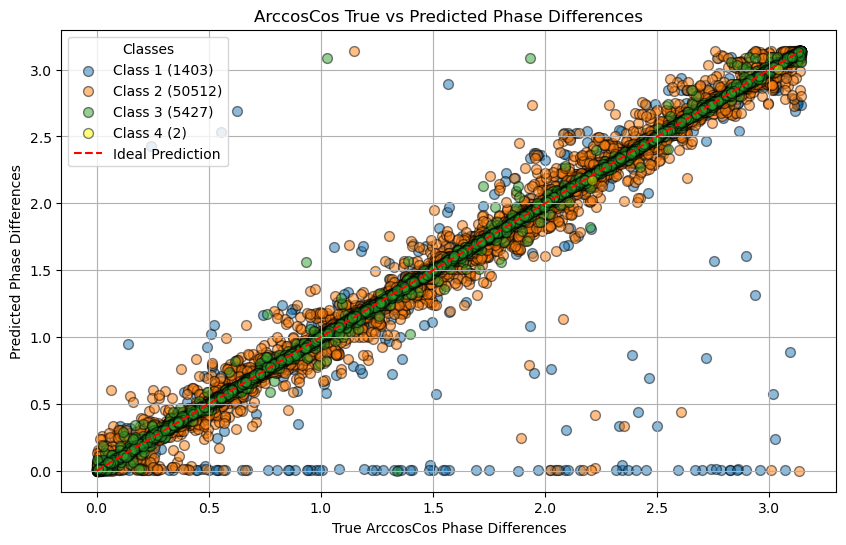

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Define colorblind-friendly colors (using the 'tab10' colormap)
color_map = {1: 'tab:blue', 2: 'tab:orange', 3: 'tab:green', 4: 'yellow'}
class_labels = {1: 'Class 1', 2: 'Class 2', 3: 'Class 3', 4: 'Class 4'}

# Count the occurrences of each class
class_counts = Counter(predicted_pulses)
print("Class counts:")
for cls, count in class_counts.items():
    print(f"Class {cls}: {count}")

plt.figure(figsize=(10, 6))

# Separate the points into "Class 2" and others
for cls in class_labels:
    # Mask to select only points of the current class
    mask = (predicted_pulses == cls)
    
    # Plot Class 2 points first (background)
    if cls == 2:
        plt.scatter(
            np.arccos(np.cos(true_phase_list[mask])),
            predicted_phase_list[mask],
            color=color_map[cls],
            marker='o',
            s=50,
            edgecolor='k',
            alpha=0.5,  # Lower opacity for background
            label=f"{class_labels[cls]} ({class_counts[cls]})"
        )
    else:
        # Plot other classes on top (foreground)
        plt.scatter(
            np.arccos(np.cos(true_phase_list[mask])),
            predicted_phase_list[mask],
            color=color_map[cls],
            marker='o',
            s=50,
            edgecolor='k',
            alpha=0.5,  # Higher opacity for foreground
            label=f"{class_labels[cls]} ({class_counts[cls]})"
        )

# Plot the ideal prediction line
plt.plot(
    [np.arccos(np.cos(true_phase_list)).min(), np.arccos(np.cos(true_phase_list)).max()], 
    [np.arccos(np.cos(true_phase_list)).min(), np.arccos(np.cos(true_phase_list)).max()], 
    color='red', linestyle='--', label='Ideal Prediction'
)

plt.xlabel('True ArccosCos Phase Differences')
plt.ylabel('Predicted Phase Differences')
plt.title('ArccosCos True vs Predicted Phase Differences')
plt.legend(title="Classes", loc="upper left")
plt.grid(True)
plt.show()


Class counts:
Class 2: 50512
Class 3: 5427
Class 1: 1403
Class 4: 2


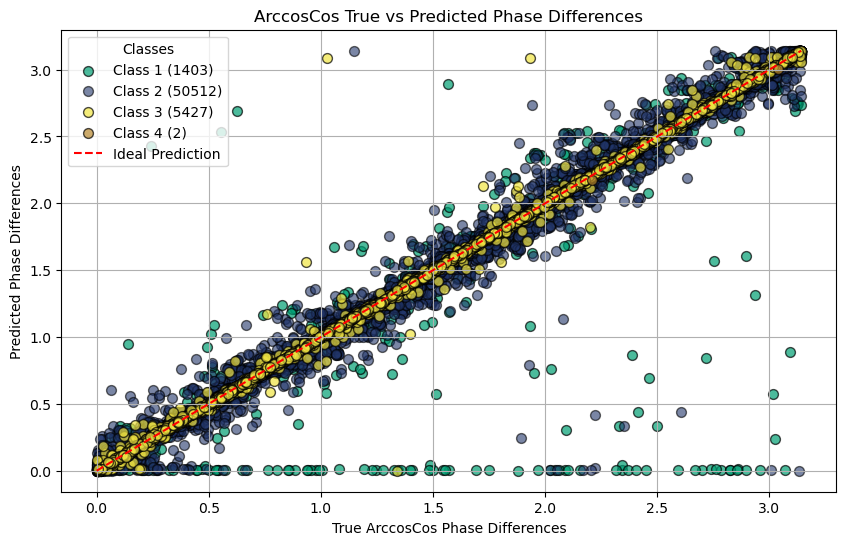

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Define colors for each class using the specified palette
color_map = {
    1: '#009E73',  # Warm brownish color
    2: '#213569',  # Cool blue color
    3: '#F0E442',  # Light yellow (high contrast with the first two)
    4: '#B7872D'   # Green (easy to distinguish from the others)
}

class_labels = {1: 'Class 1', 2: 'Class 2', 3: 'Class 3', 4: 'Class 4'}

# Count the occurrences of each class
class_counts = Counter(predicted_pulses)
print("Class counts:")
for cls, count in class_counts.items():
    print(f"Class {cls}: {count}")

plt.figure(figsize=(10, 6))

# Separate the points into "Class 2" and others
for cls in class_labels:
    # Mask to select only points of the current class
    mask = (predicted_pulses == cls)
    
    # Plot Class 2 points first (background)
    if cls == 2:
        plt.scatter(
            np.arccos(np.cos(true_phase_list[mask])),
            predicted_phase_list[mask],
            color=color_map[cls],
            marker='o',
            s=50,
            edgecolor='k',
            alpha=0.6,  # Lower opacity for background
            label=f"{class_labels[cls]} ({class_counts[cls]})"
        )
    else:
        # Plot other classes on top (foreground)
        plt.scatter(
            np.arccos(np.cos(true_phase_list[mask])),
            predicted_phase_list[mask],
            color=color_map[cls],
            marker='o',
            s=50,
            edgecolor='k',
            alpha=0.7,  # Higher opacity for foreground
            label=f"{class_labels[cls]} ({class_counts[cls]})"
        )

# Plot the ideal prediction line
plt.plot(
    [np.arccos(np.cos(true_phase_list)).min(), np.arccos(np.cos(true_phase_list)).max()], 
    [np.arccos(np.cos(true_phase_list)).min(), np.arccos(np.cos(true_phase_list)).max()], 
    color='red', linestyle='--', label='Ideal Prediction'
)

plt.xlabel('True ArccosCos Phase Differences')
plt.ylabel('Predicted Phase Differences')
plt.title('ArccosCos True vs Predicted Phase Differences')
plt.legend(title="Classes", loc="upper left")
plt.grid(True)
plt.show()


Class counts:
Class 2: 50512
Class 3: 5427
Class 1: 1403
Class 4: 2


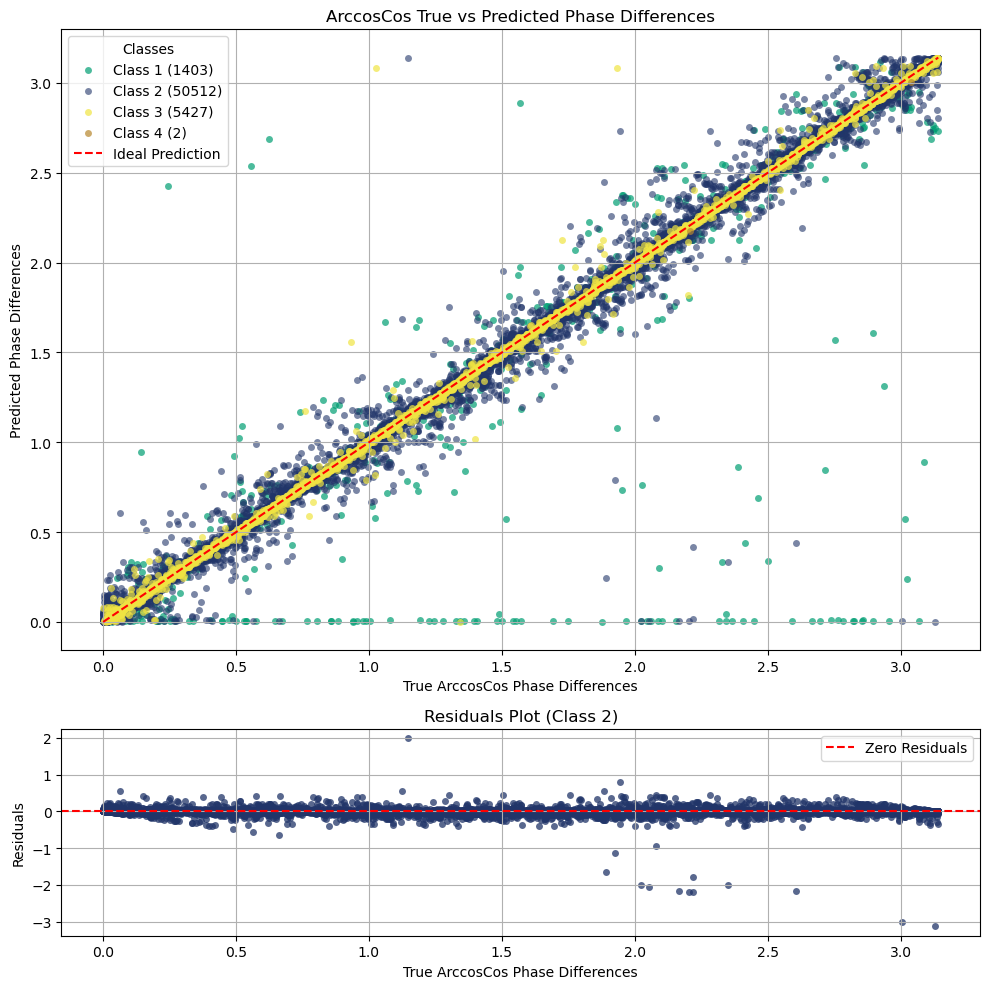

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Define colors for each class using the specified palette
color_map = {
    1: '#009E73',  # Warm brownish color
    2: '#213569',  # Cool blue color
    3: '#F0E442',  # Light yellow (high contrast with the first two)
    4: '#B7872D'   # Green (easy to distinguish from the others)
}

class_labels = {1: 'Class 1', 2: 'Class 2', 3: 'Class 3', 4: 'Class 4'}

# Count the occurrences of each class
class_counts = Counter(predicted_pulses)
print("Class counts:")
for cls, count in class_counts.items():
    print(f"Class {cls}: {count}")

# Create the figure with two subplots (scatter plot and residuals plot)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 1]})

# Scatter plot on the first subplot (ax1)
for cls in class_labels:
    # Mask to select only points of the current class
    mask = (predicted_pulses == cls)
    
    # Plot Class 2 points first (background)
    if cls == 2:
        ax1.scatter(
            np.arccos(np.cos(true_phase_list[mask])),
            predicted_phase_list[mask],
            color=color_map[cls],
            marker='o',
            s=25,
            edgecolor='k',
            linewidth=0,
            alpha=0.6,  # Lower opacity for background
            label=f"{class_labels[cls]} ({class_counts[cls]})"
        )
    else:
        # Plot other classes on top (foreground)
        ax1.scatter(
            np.arccos(np.cos(true_phase_list[mask])),
            predicted_phase_list[mask],
            color=color_map[cls],
            marker='o',
            s=25,
            edgecolor='k',
            linewidth=0,
            alpha=0.7,  # Higher opacity for foreground
            label=f"{class_labels[cls]} ({class_counts[cls]})"
        )

# Plot the ideal prediction line on ax1
ax1.plot(
    [np.arccos(np.cos(true_phase_list)).min(), np.arccos(np.cos(true_phase_list)).max()], 
    [np.arccos(np.cos(true_phase_list)).min(), np.arccos(np.cos(true_phase_list)).max()], 
    color='red', linestyle='--', label='Ideal Prediction'
)

ax1.set_xlabel('True ArccosCos Phase Differences')
ax1.set_ylabel('Predicted Phase Differences')
ax1.set_title('ArccosCos True vs Predicted Phase Differences')
ax1.legend(title="Classes", loc="upper left")
ax1.grid(True)

# Residuals plot on the second subplot (ax2)
# Filter for class 2 points only for the residuals plot
mask_class_2 = (predicted_pulses == 2)
true_phase_class_2 = true_phase_list[mask_class_2]
predicted_phase_class_2 = predicted_phase_list[mask_class_2]

# Calculate residuals for class 2 only
residuals_class_2 = predicted_phase_class_2 - np.arccos(np.cos(true_phase_class_2))

# Plot residuals for Class 2
ax2.scatter(
    np.arccos(np.cos(true_phase_class_2)), 
    residuals_class_2, 
    c=color_map[2],  # Use color for Class 2
    marker='o',
    s=25,
    edgecolor='k',
    linewidth=0,
    alpha=0.75
)

# Add a horizontal line for zero residuals (perfect prediction)
ax2.axhline(0, color='red', linestyle='--', label='Zero Residuals')

# Set labels and title for the residuals plot
ax2.set_xlabel('True ArccosCos Phase Differences')
ax2.set_ylabel('Residuals')
ax2.set_title('Residuals Plot (Class 2)')
ax2.legend()
ax2.grid(True)

# Adjust layout so plots don't overlap
plt.tight_layout()
plt.savefig("plot_output.pdf", format="pdf", dpi=300, bbox_inches='tight', transparent=True)

# Show the plot
plt.show()


Class counts:
Class 2: 50512
Class 3: 5427
Class 1: 1403
Class 4: 2


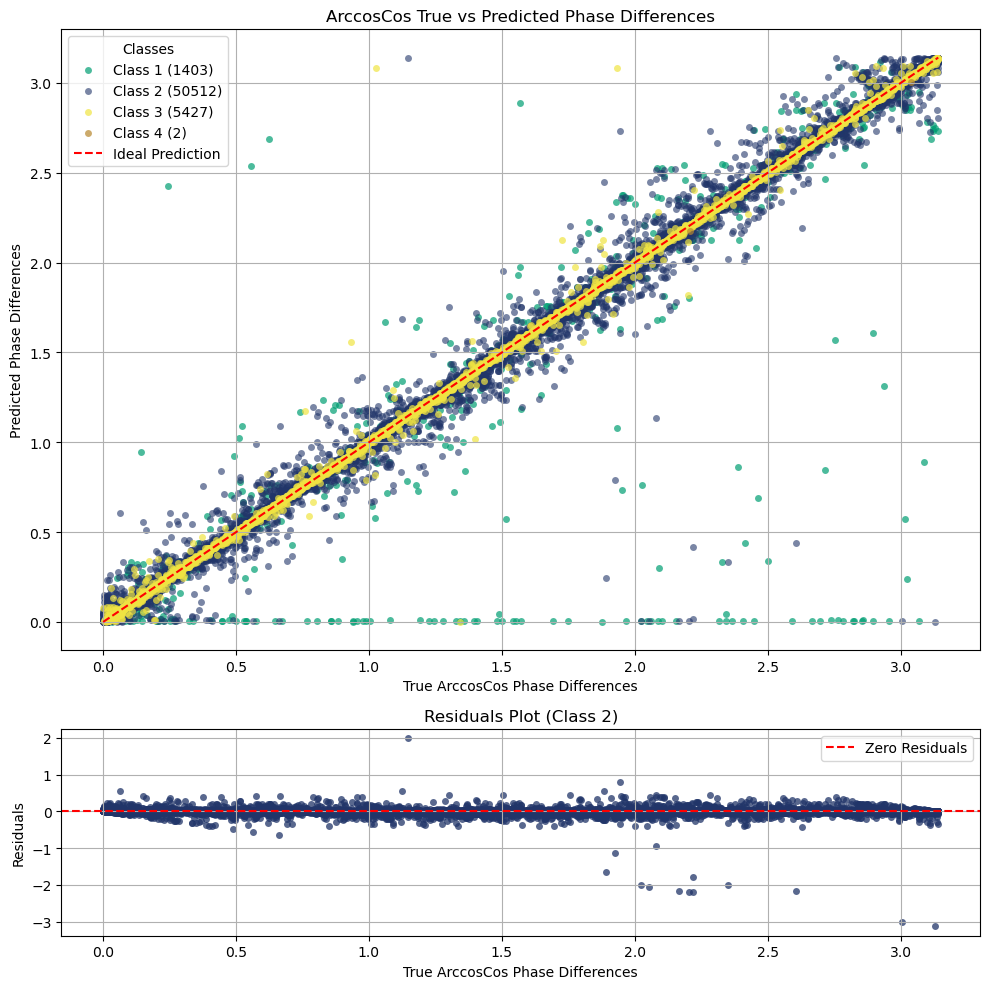

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Define colors for each class using the specified palette
color_map = {
    1: '#009E73',  # Warm brownish color
    2: '#213569',  # Cool blue color
    3: '#F0E442',  # Light yellow (high contrast with the first two)
    4: '#B7872D'   # Green (easy to distinguish from the others)
}

class_labels = {1: 'Class 1', 2: 'Class 2', 3: 'Class 3', 4: 'Class 4'}

# Count the occurrences of each class
class_counts = Counter(predicted_pulses)
print("Class counts:")
for cls, count in class_counts.items():
    print(f"Class {cls}: {count}")

# Create the figure with two subplots (scatter plot and residuals plot)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 1]})

# Scatter plot on the first subplot (ax1)
for cls in class_labels:
    # Mask to select only points of the current class
    mask = (predicted_pulses == cls)
    
    # Plot Class 2 points first (background)
    if cls == 2:
        ax1.scatter(
            np.arccos(np.cos(true_phase_list[mask])),
            predicted_phase_list[mask],
            color=color_map[cls],
            marker='o',
            s=25,
            edgecolor='k',
            linewidth=0,
            alpha=0.6,  # Lower opacity for background
            label=f"{class_labels[cls]} ({class_counts[cls]})",
            rasterized=True  # Rasterize this scatter plot
        )
    else:
        # Plot other classes on top (foreground)
        ax1.scatter(
            np.arccos(np.cos(true_phase_list[mask])),
            predicted_phase_list[mask],
            color=color_map[cls],
            marker='o',
            s=25,
            edgecolor='k',
            linewidth=0,
            alpha=0.7,  # Higher opacity for foreground
            label=f"{class_labels[cls]} ({class_counts[cls]})",
            rasterized=True  # Rasterize this scatter plot
        )

# Plot the ideal prediction line on ax1
ax1.plot(
    [np.arccos(np.cos(true_phase_list)).min(), np.arccos(np.cos(true_phase_list)).max()], 
    [np.arccos(np.cos(true_phase_list)).min(), np.arccos(np.cos(true_phase_list)).max()], 
    color='red', linestyle='--', label='Ideal Prediction'
)

ax1.set_xlabel('True ArccosCos Phase Differences')
ax1.set_ylabel('Predicted Phase Differences')
ax1.set_title('ArccosCos True vs Predicted Phase Differences')
ax1.legend(title="Classes", loc="upper left")
ax1.grid(True)

# Residuals plot on the second subplot (ax2)
# Filter for class 2 points only for the residuals plot
mask_class_2 = (predicted_pulses == 2)
true_phase_class_2 = true_phase_list[mask_class_2]
predicted_phase_class_2 = predicted_phase_list[mask_class_2]

# Calculate residuals for class 2 only
residuals_class_2 = predicted_phase_class_2 - np.arccos(np.cos(true_phase_class_2))

# Plot residuals for Class 2
ax2.scatter(
    np.arccos(np.cos(true_phase_class_2)), 
    residuals_class_2, 
    c=color_map[2],  # Use color for Class 2
    marker='o',
    s=25,
    edgecolor='k',
    linewidth=0,
    alpha=0.75,
    rasterized=True  # Rasterize this scatter plot
)

# Add a horizontal line for zero residuals (perfect prediction)
ax2.axhline(0, color='red', linestyle='--', label='Zero Residuals')

# Set labels and title for the residuals plot
ax2.set_xlabel('True ArccosCos Phase Differences')
ax2.set_ylabel('Residuals')
ax2.set_title('Residuals Plot (Class 2)')
ax2.legend()
ax2.grid(True)

# Adjust layout so plots don't overlap
plt.tight_layout()
plt.savefig("plot_output.pdf", format="pdf", dpi=300, bbox_inches='tight', transparent=True)

# Show the plot
plt.show()


Class counts:
Class 2: 50512
Class 3: 5427
Class 1: 1403
Class 4: 2


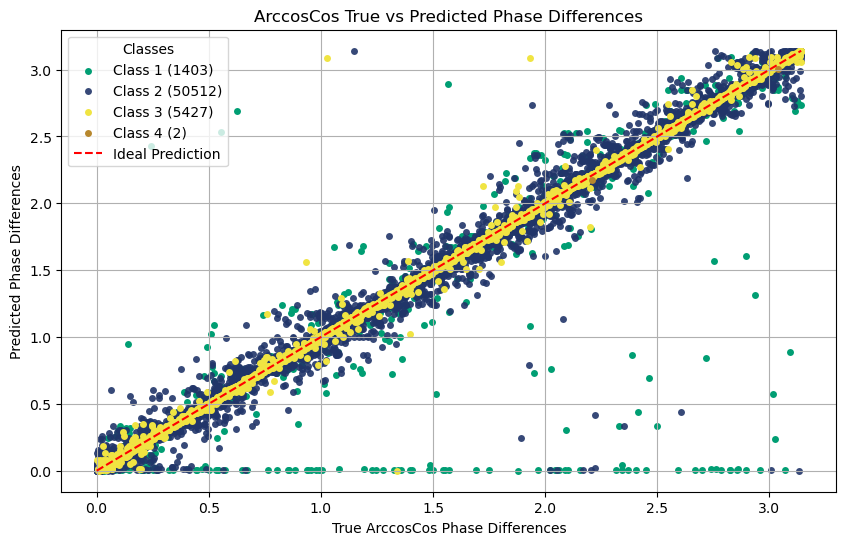

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Define colors for each class using the specified palette
color_map = {
    1: '#009E73',  # Warm brownish color
    2: '#213569',  # Cool blue color
    3: '#F0E442',  # Light yellow (high contrast with the first two)
    4: '#B7872D'   # Green (easy to distinguish from the others)
}

class_labels = {1: 'Class 1', 2: 'Class 2', 3: 'Class 3', 4: 'Class 4'}

# Count the occurrences of each class
class_counts = Counter(predicted_pulses)
print("Class counts:")
for cls, count in class_counts.items():
    print(f"Class {cls}: {count}")

plt.figure(figsize=(10, 6))

# Separate the points into "Class 2" and others
for cls in class_labels:
    # Mask to select only points of the current class
    mask = (predicted_pulses == cls)
    
    # Plot Class 2 points first (background)
    if cls == 2:
        plt.scatter(
            np.arccos(np.cos(true_phase_list[mask])),
            predicted_phase_list[mask],
            color=color_map[cls],
            marker='o',
            s=25,  # Increase marker size for better visibility
            edgecolor='black',  # Black outline
            linewidth=0,  # Thinner outline
            alpha=0.9,  # Lower opacity for background
            label=f"{class_labels[cls]} ({class_counts[cls]})"
        )
    else:
        # Plot other classes on top (foreground)
        plt.scatter(
            np.arccos(np.cos(true_phase_list[mask])),
            predicted_phase_list[mask],
            color=color_map[cls],
            marker='o',
            s=25,  # Adjust size to ensure visibility
            edgecolor='black',  # Black outline
            linewidth=0,  # Thinner outline
            alpha=1.0,  # Higher opacity for foreground
            label=f"{class_labels[cls]} ({class_counts[cls]})"
        )

# Plot the ideal prediction line
plt.plot(
    [np.arccos(np.cos(true_phase_list)).min(), np.arccos(np.cos(true_phase_list)).max()], 
    [np.arccos(np.cos(true_phase_list)).min(), np.arccos(np.cos(true_phase_list)).max()], 
    color='red', linestyle='--', label='Ideal Prediction'
)

plt.xlabel('True ArccosCos Phase Differences')
plt.ylabel('Predicted Phase Differences')
plt.title('ArccosCos True vs Predicted Phase Differences')
plt.legend(title="Classes", loc="upper left")
plt.grid(True)

# Save the plot in high-quality PDF format
plt.savefig("plot_output.pdf", format="pdf", dpi=300, bbox_inches='tight', transparent=True)

# Show the plot
plt.show()


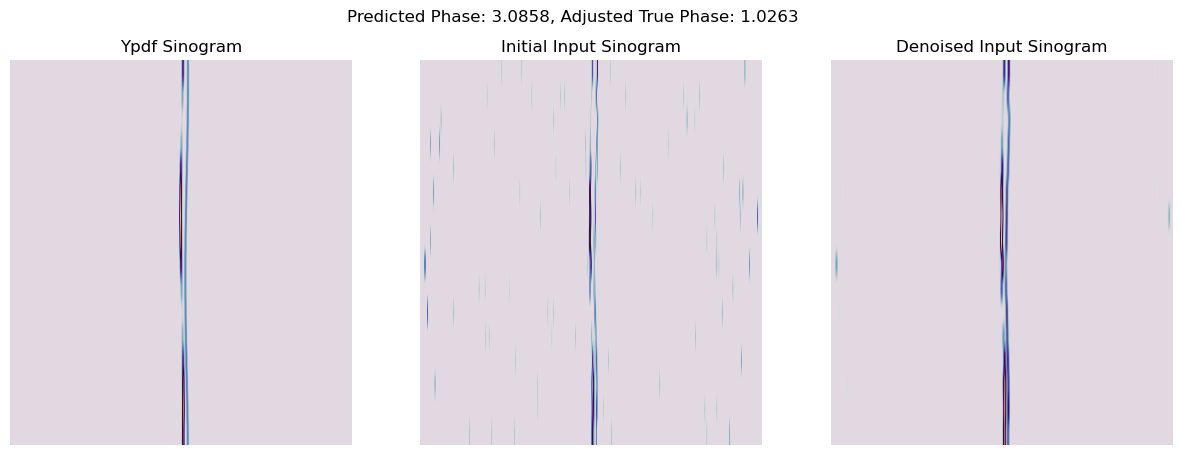

In [62]:
# Path to one of the saved example files
dir = "/sdf/data/lcls/ds/prj/prjs2e21/results/COOKIE_ML_Output/regression/run_09082024_Resnext34_dif_Ximg_Denoised_2/evaluate_outputs5_11112024_2/Resnext34_dif_XimgDenoised_wrapping_4errorExamples/"
example_file = dir+"class_2_example_1.npz"  # Update with the actual path
example_file = dir +"class_2_example_5.npz"  # Update with the actual path
example_file = dir +"class_3_example_0.npz"  # Update with the actual path
# example_file = dir +"class_1_example_0.npz"  # Update with the actual path

# Load the example data
with np.load(example_file) as data:
    input_sino = data["input_sino"]
    denoised_sino = data["denoised_sino"]
    ypdf_sino = data["ypdf_sino"]
    predicted_phase = data["predicted_phase"]
    true_phase = data["true_phase"]

# Calculate the adjusted true phase (as was done previously in the script)
true_phase_adjusted = np.arccos(np.cos(true_phase))

# Plot the sinograms and phase information
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
cmap = "twilight"

# Plot the ypdf sinogram
axes[0].imshow(ypdf_sino, cmap=cmap, aspect='auto')
axes[0].set_title("Ypdf Sinogram")
axes[0].axis('off')

# Plot the initial input sinogram
axes[1].imshow(input_sino, cmap=cmap, aspect='auto')
axes[1].set_title("Initial Input Sinogram")
axes[1].axis('off')

# Plot the denoised input sinogram
axes[2].imshow(denoised_sino, cmap=cmap, aspect='auto')
axes[2].set_title("Denoised Input Sinogram")
axes[2].axis('off')

# Add text annotations with the predicted and true phase
fig.suptitle(f"Predicted Phase: {predicted_phase:.4f}, Adjusted True Phase: {true_phase_adjusted:.4f}", fontsize=12)
plt.savefig("class1_example.pdf", format="pdf", dpi=300, bbox_inches='tight', transparent=True)

# Display the plot
plt.show()

In [3]:
path = "/sdf/data/lcls/ds/prj/prjs2e21/results/COOKIE_ML_Output/regression/run_08142024_regressionResnet18_5_XimgTrained/evaluate_outputs_11122024/resNetregression_18_2000classes_XimgDenoised_plot_data.pkl"
with open(path, 'rb') as f:
    data = pickle.load(f)

# Access specific elements
true_phase_array = data["true_phase_array"]
predicted_phase_array = data["predicted_phase_array"]


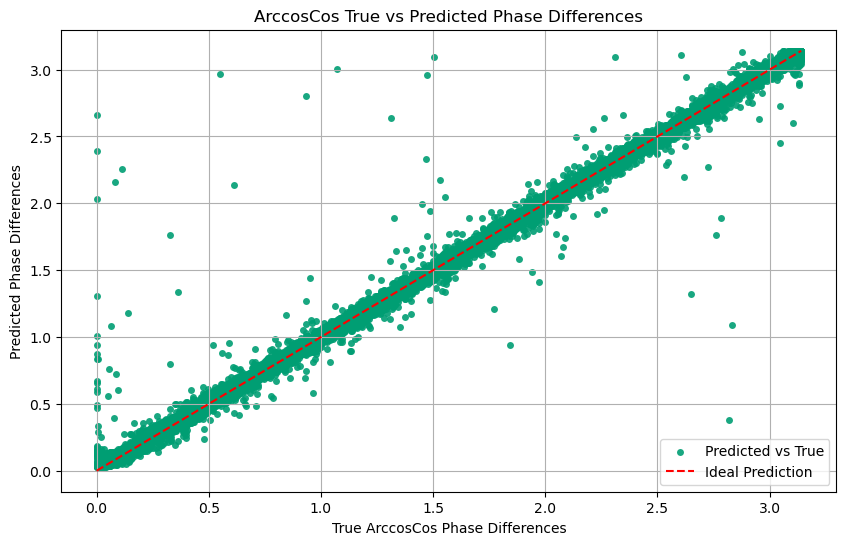

In [4]:
plt.figure(figsize=(10, 6))

# Scatter plot with color-coded points
scatter = plt.scatter(np.arccos(np.cos(true_phase_array)), 
                    np.arccos(np.cos(predicted_phase_array)), 
                    marker='o',
                    color='#009E73',
                    s=25,
                    label='Predicted vs True', 
                    linewidth=0,  # Thinner outline
                    alpha=0.9  # Lower opacity for background
                    )
        
# # Set colorbar, ensuring the ticks are in the middle of each color band
# cbar = plt.colorbar(scatter, ticks=np.linspace(0, 4, 5))  # Midpoints for color categories
# cbar.ax.set_yticklabels(['0', '1', '2', '3', '4+'])
# cbar.set_label('LSTM Classifier Categories')

# Plot the ideal prediction line
plt.plot([np.arccos(np.cos(true_phase_array)).min(), np.arccos(np.cos(true_phase_array)).max()], 
        [np.arccos(np.cos(true_phase_array)).min(), np.arccos(np.cos(true_phase_array)).max()], 
        color='red', linestyle='--', label='Ideal Prediction')

plt.xlabel('True ArccosCos Phase Differences')
plt.ylabel('Predicted Phase Differences')
plt.title('ArccosCos True vs Predicted Phase Differences')
plt.legend()
plt.grid(True)


In [5]:
plt.figure(figsize=(10, 6))

# Scatter plot with color-coded points
scatter = plt.scatter(np.arccos(np.cos(true_phase_array), 
                    np.arccos(np.cos(predicted_phase_array), 
                    marker='o',
                    color='#009E73',
                    s=25,
                    label='Predicted vs True', 
                    linewidth=0,  # Thinner outline
                    alpha=0.9  # Lower opacity for background
                    )
        
# # Set colorbar, ensuring the ticks are in the middle of each color band
# cbar = plt.colorbar(scatter, ticks=np.linspace(0, 4, 5))  # Midpoints for color categories
# cbar.ax.set_yticklabels(['0', '1', '2', '3', '4+'])
# cbar.set_label('LSTM Classifier Categories')



plt.xlabel('True ArccosCos Phase Differences')
plt.ylabel('Predicted Phase Differences')
plt.title('ArccosCos True vs Predicted Phase Differences')
plt.legend()
plt.grid(True)


SyntaxError: '(' was never closed (908255308.py, line 4)

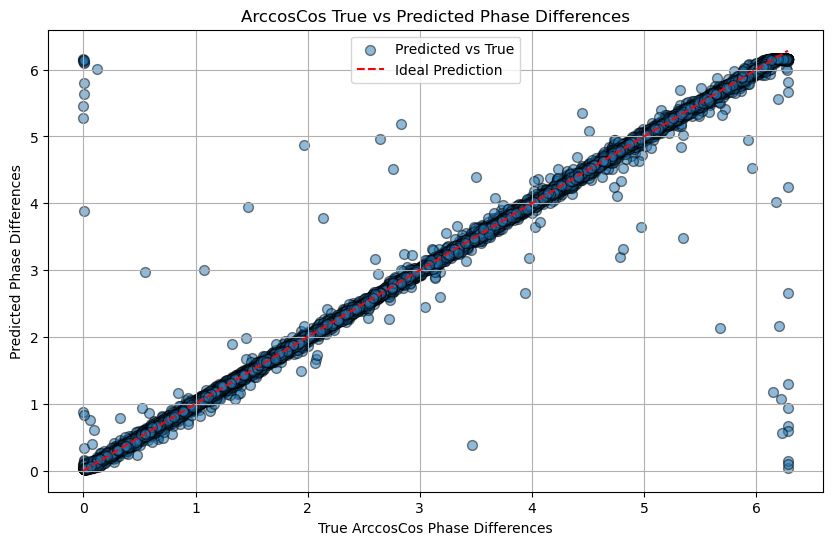

In [6]:
plt.figure(figsize=(10, 6))

# Scatter plot with color-coded points
scatter = plt.scatter((true_phase_array), 
                    ((predicted_phase_array)), 
                    marker='o',
                    label='Predicted vs True', 
                    s=50, edgecolor='k', alpha=0.5)
        
# # Set colorbar, ensuring the ticks are in the middle of each color band
# cbar = plt.colorbar(scatter, ticks=np.linspace(0, 4, 5))  # Midpoints for color categories
# cbar.ax.set_yticklabels(['0', '1', '2', '3', '4+'])
# cbar.set_label('LSTM Classifier Categories')

# Plot the ideal prediction line
plt.plot([(true_phase_array).min(), (true_phase_array).max()], 
        [(true_phase_array).min(),(true_phase_array).max()], 
        color='red', linestyle='--', label='Ideal Prediction')

plt.xlabel('True ArccosCos Phase Differences')
plt.ylabel('Predicted Phase Differences')
plt.title('ArccosCos True vs Predicted Phase Differences')
plt.legend()
plt.grid(True)

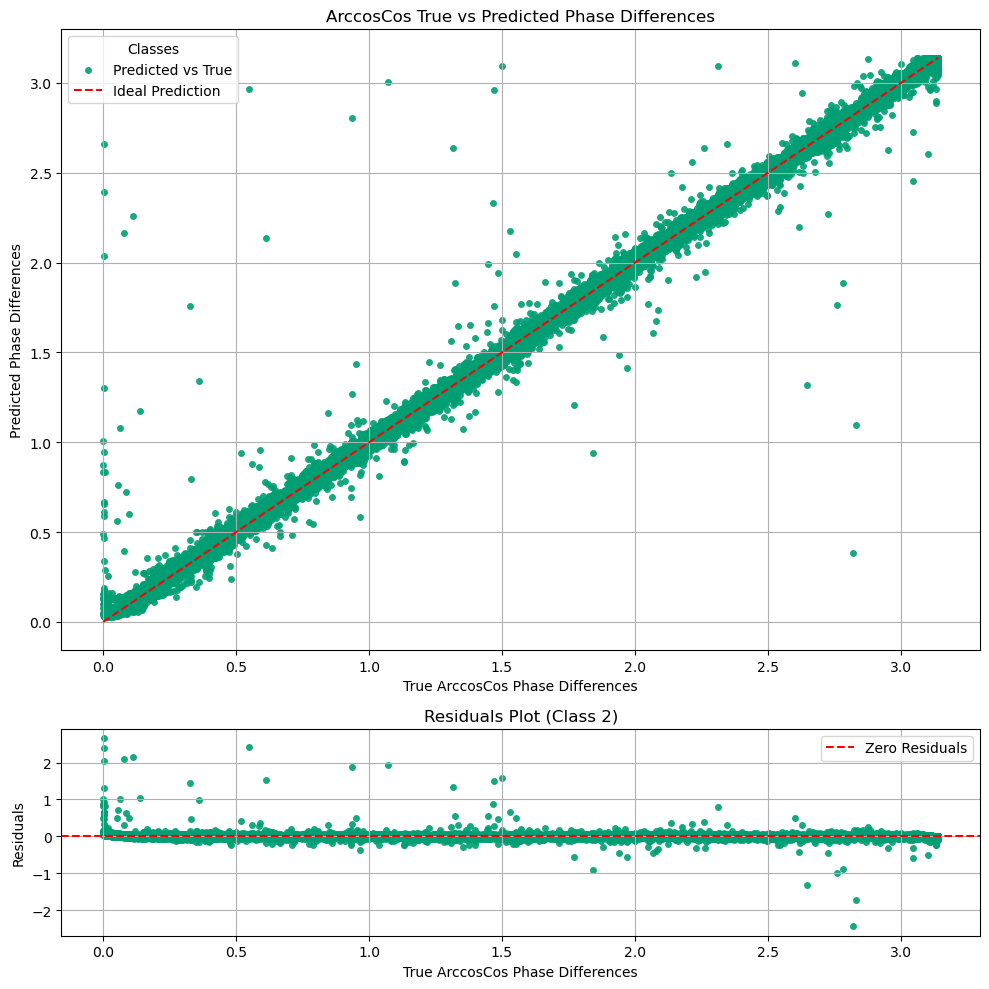

0.04612857925370918


In [15]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

#
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 1]})

ax1.scatter(np.arccos(np.cos(true_phase_array)), 
                    np.arccos(np.cos(predicted_phase_array)), 
                    marker='o',
                    color='#009E73',
                    s=25,
                    label='Predicted vs True', 
                    linewidth=0,  # Thinner outline
                    alpha=0.9,  # Lower opacity for background,
                    rasterized=True
                    )
# Plot the ideal prediction line on ax1
ax1.plot(
    [np.arccos(np.cos(true_phase_array)).min(), np.arccos(np.cos(true_phase_array)).max()], 
    [np.arccos(np.cos(true_phase_array)).min(), np.arccos(np.cos(true_phase_array)).max()], 
    color='red', linestyle='--', label='Ideal Prediction'
)

ax1.set_xlabel('True ArccosCos Phase Differences')
ax1.set_ylabel('Predicted Phase Differences')
ax1.set_title('ArccosCos True vs Predicted Phase Differences')
ax1.legend(title="Classes", loc="upper left")
ax1.grid(True)

# Residuals plot on the second subplot (ax2)
# Filter for class 2 points only for the residuals plot


# Calculate residuals for class 2 only
residuals_class_2 = np.arccos(np.cos(predicted_phase_array)) - np.arccos(np.cos(true_phase_array))
rmse = np.sqrt(np.mean(residuals_class_2**2))

# Plot residuals for Class 2
ax2.scatter(
    np.arccos(np.cos(true_phase_array)), 
    residuals_class_2, 
    color='#009E73',  # Use color for Class 2
    marker='o',
    s=25,
    edgecolor='k',
    linewidth=0,
    alpha=0.9,
    rasterized=True  # Rasterize this scatter plot
)

# Add a horizontal line for zero residuals (perfect prediction)
ax2.axhline(0, color='red', linestyle='--', label='Zero Residuals')

# Set labels and title for the residuals plot
ax2.set_xlabel('True ArccosCos Phase Differences')
ax2.set_ylabel('Residuals')
ax2.set_title('Residuals Plot (Class 2)')
ax2.legend()
ax2.grid(True)

# Adjust layout so plots don't overlap
plt.tight_layout()
# plt.savefig("plot_output_1pulse.pdf", format="pdf", dpi=300, bbox_inches='tight')
# Set SVG font type to 'none' to keep text editable
plt.rcParams['svg.fonttype'] = 'none'

# Save the figure as an SVG
plt.savefig("high_quality_rasterized_text2.svg", format="svg", dpi=300)

# Show the plot
plt.show()
print(rmse)

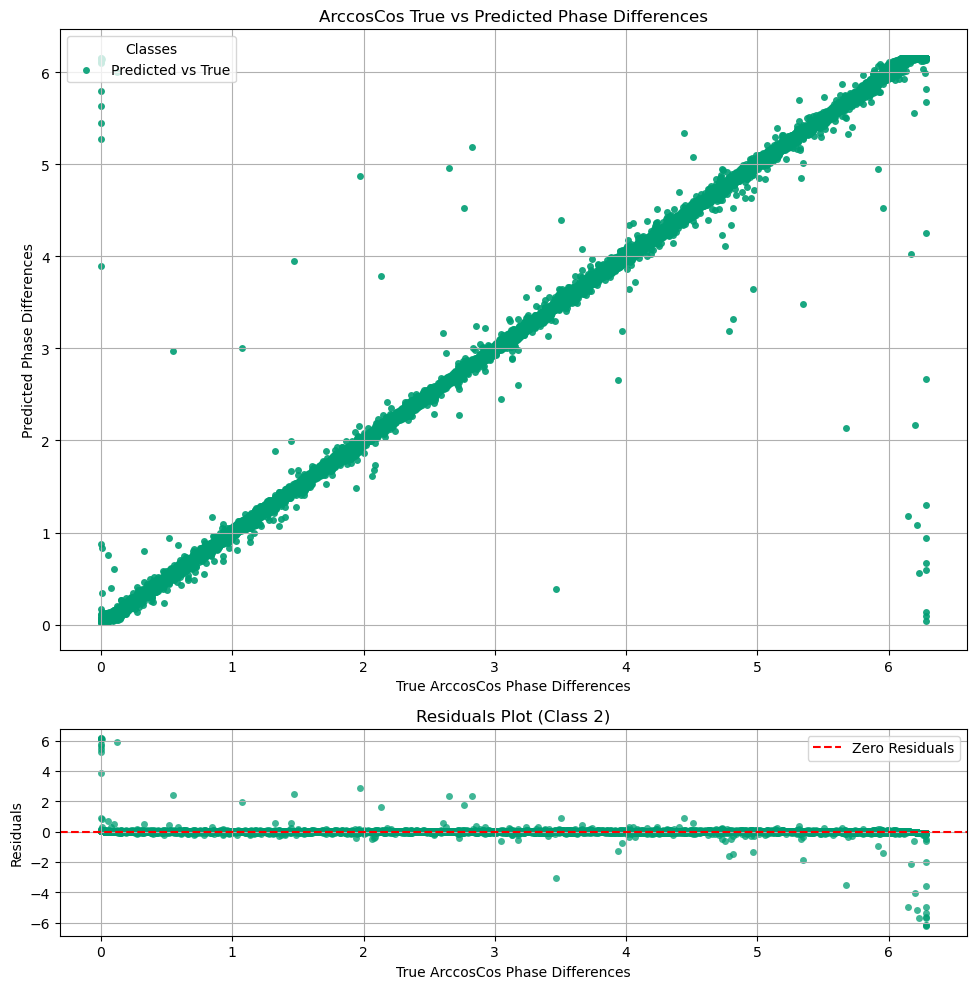

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

#
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 1]})

ax1.scatter(true_phase_array, 
                    predicted_phase_array, 
                    marker='o',
                    color='#009E73',
                    s=25,
                    label='Predicted vs True', 
                    linewidth=0,  # Thinner outline
                    alpha=0.9,  # Lower opacity for background,
                    rasterized=True
                    )
# Plot the ideal prediction line on ax1
# ax1.plot(
#     [np.arccos(np.cos(true_phase_list)).min(), np.arccos(np.cos(true_phase_list)).max()], 
#     [np.arccos(np.cos(true_phase_list)).min(), np.arccos(np.cos(true_phase_list)).max()], 
#     color='red', linestyle='--', label='Ideal Prediction'
# )

ax1.set_xlabel('True ArccosCos Phase Differences')
ax1.set_ylabel('Predicted Phase Differences')
ax1.set_title('ArccosCos True vs Predicted Phase Differences')
ax1.legend(title="Classes", loc="upper left")
ax1.grid(True)

# Residuals plot on the second subplot (ax2)
# Filter for class 2 points only for the residuals plot


# Calculate residuals for class 2 only
residuals_class_2 = predicted_phase_array - true_phase_array

# Plot residuals for Class 2
ax2.scatter(
    true_phase_array, 
    residuals_class_2, 
    color='#009E73',  # Use color for Class 2
    marker='o',
    s=25,
    edgecolor='k',
    linewidth=0,
    alpha=0.75,
    rasterized=True  # Rasterize this scatter plot
)

# Add a horizontal line for zero residuals (perfect prediction)
ax2.axhline(0, color='red', linestyle='--', label='Zero Residuals')

# Set labels and title for the residuals plot
ax2.set_xlabel('True ArccosCos Phase Differences')
ax2.set_ylabel('Residuals')
ax2.set_title('Residuals Plot (Class 2)')
ax2.legend()
ax2.grid(True)

# Adjust layout so plots don't overlap
plt.tight_layout()
# plt.savefig("plot_output.pdf", format="pdf", dpi=300, bbox_inches='tight', transparent=True)

# Show the plot
plt.show()
